# Spaceship around a black hole - a theoretical approach

Before creating the game, I'll introduce and compute some quantities in order to study the system behavior. We will by describing the simplified model we are using.

We have a spaceship of mass $m$ revolving around a black hole of mass $M$. The black hole has a Schwarzschild radius $R_S$, relating to the event horizon, defined as 

$$ [1] \rightarrow   \;\;\;      R_S = \frac{2GM}{c^2}$$

Where $G \approx 6.67\cdot10^{-11}$ is the universal gravitional constant and $c$ the speed of light. 

## On the event horizon

Recall the expression of [1]. One can define in orbital mechanics the _escape velocity_ $v_e$ to be the velocity at which an object should move in order to leave the gravitional attraction due to a body. Mathematically, 

$$ v_e = \sqrt{\frac{2GM}{r}} $$

We can easily see that given $r = R_S$, $v_e$ equals to $c$. As $v_e$ is also proportional to $1/r$, a lesser distance from the black hole would mean a higher escape velocity than $c$ needed to leave gravitational effects : it is forbidden by special relativity. 

## Reduced units

To simplify equations, we will work with reduced units by setting $R_S = c = 1$. It follows from [1] that $M = 1/2G$. 

All quantities will be expressed as multiples of $R_S$, $c$ and $M$, with proportional constants noted with greek letters. As such, we define the mass of the spaceship $m = \alpha M$ to be a small fraction of the mass of the black hole. 

## Dynamics

We will use the law of Newton to model the system.

$$ \partial_t \; \vec{p} = \sum \vec{F} $$

Accounting two forces in the right-hand side. The first one is the classical gravitational force 

$$ \vec{F}_G = - G \frac{Mm}{r^2} \vec{e}_r$$

And the second one brings a first order relativistic correction to dynamics,

$$ \vec{F}_R = -\frac{3}{2} m \dot\theta^2 R_S  \vec{e}_r$$

This reduces to a single differential equation in polar coordinates :

$$[2] \rightarrow   \;\;\;      \ddot r = - G \frac{M}{r^2} + (r - \frac{3}{2}R_S \dot\theta ^2) $$

We can approximate a solution by the following expression for $r$,
$$  [3] \rightarrow   \;\;\;      r_\pm (\theta)= \frac{\frac{q}{2} \pm \sqrt{\frac{q^2}{4} - \frac{3}{2}R_S q (1+e\cos\theta) }}{1+e\cos\theta} $$

Where $q$ is the _semi latus rectum_ of the ellipse and $e$ the eccentricity. Given the space region we are, we can expose two solutions. If $r > 3R_S$, we'll use $r_+$ ; $r_-$ otherwise. This approximation will help us studying the orbit paths of the spaceship before relying on numerical computations to solve the system.

## Input parameters

<a href="https://phys.libretexts.org/Bookshelves/Astronomy__Cosmology/Celestial_Mechanics_(Tatum)/09%3A_The_Two_Body_Problem_in_Two_Dimensions/9.04%3A_Kepler's_First_and_Third_Laws_from_Newton's_Law_of_Gravitation"> Resources </a>

The following quantities $\vec{r}(t = 0), \vec{v}(t = 0)$ are known. As there's conservation of angular momentum, 

$$r^2 \dot \theta = \ell_0$$

Where $\ell_0$ is the specific angular momentum ($\ell_0 = L_0 / m)$, one can reckon $\ell_0$ and deduce eccentricity of the orbit path,

$$ e = \sqrt{1 + \frac{2 \epsilon \ell_0^2}{\mu^2}} $$ 

Where $\epsilon = \frac{v^2}{2} - \frac{\mu}{r}$ is the specific total energy  (Vis-viva relation) and $\mu = (m+M)G \approx MG$ is the gravitational parameter. Finally, compute the semi latus rectum with 

$$ q = \frac{\ell_0^2}{\mu} $$

We will test out different input parameters and study according trajectories.

## Post-newtonian expansion is only valid for weak gravitational field

According to theory, relativistic corrections brought by post-newtonian expansion is only valid for a weak gravitational field. Let's recall the classical gravitational field

$$ \Phi = - G \frac{M}{r^2} $$ 

To weaken $\Phi$, we can only adopt two strategies : decreasing $M$ or increasing $r$. As we are dealing with a black hole, $M$ is condemned. The only solution is to search values for $r$ that are sufficiently interesting. Let's be a bit descriptive : 

* $r \leq R_S$ : at this distance, the gravitational field is very strong. Post-newtonian approximation isn't valuable here.
* $r \in (R_S, \frac{3}{2} R_S]$ : at $1.5R_S$ is the **photon sphere**. Orbits of massive objects should be unstable.
* $r \in (\frac{3}{2} R_S, 3R_S)$ : $3R_S$ is the first stable orbit. Approximation done using $r_-$.
* $r \in (3R_S,+\infty)$ : approximation done using $r_+$.

**Notes** 

Warning : 

<a href="https://www.phys.ufl.edu/courses/phz6607/fall20/Reports/Jinye_Yang_Post-Newtonian_Theory.pdf">Post-newtonian approximations are only valid within a weak gravitational field.</a>

In [96]:
import numpy as np
import matplotlib.pyplot as plt

In [97]:
# physical constants
G = 6.67*10E-11
c = 1
R_S = 110

# scaling factors
alpha = 10E-18

# physical quantities
M = 1/(2*G)
m = alpha * M
mu = M * G

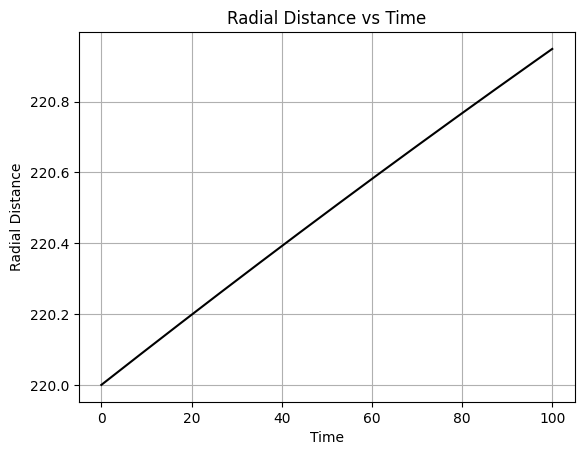

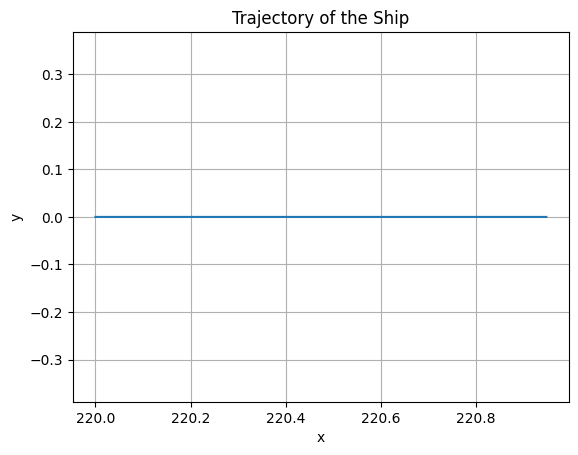

In [101]:
import numpy as np
import matplotlib.pyplot as plt

# Physical constants
G = 6.67e-11  # Corrected gravitational constant
c = 1         # Speed of light in natural units
R_S = 110     # Schwarzschild radius (ensure units are consistent)

# Scaling factors
alpha = 1e-18  # Corrected scaling factor

# Physical quantities
M = 1/(2*G)
m = alpha * M
mu = M * G

# Data lists
rrs = []
rthetas = []
radial_velocities = []
tangential_velocities = []

xs = []
ys = []

# Integration parameters
MAX_STEP = 10000
ts = np.linspace(0, 100, num=MAX_STEP)
dt = ts[1] - ts[0]

class Ship():
    def __init__(self, mass, rr, rtheta, rdot, thetadot):
        self.mass = mass
        self.rr = rr
        self.rtheta = rtheta
        self.rdot = rdot
        self.thetadot = thetadot
        self.l0 = self.rr ** 2 * self.thetadot

    def radial_velocity(self):
        return self.rdot

    def tangential_velocity(self):
        return self.rr * self.thetadot

    def x(self):
        return self.rr * np.cos(self.rtheta)

    def y(self):
        return self.rr * np.sin(self.rtheta)

# Initial condition
ship = Ship(
    mass=m,
    rr=2 * R_S,
    rtheta=0.,
    rdot=0.01 * c,
    thetadot=0.0 * c
)

# Append initial values
rrs.append(ship.rr)
rthetas.append(ship.rtheta)
radial_velocities.append(ship.radial_velocity())
tangential_velocities.append(ship.tangential_velocity())

# Initialize xs and ys with initial position
xs.append(ship.x())
ys.append(ship.y())

def radial_acc(entity):
    # Gravitational acceleration with relativistic correction
    a = (-G * M) / (entity.rr ** 2)
    b = (entity.rr - (3 / 2) * R_S) * (entity.l0 ** 2) / (entity.rr ** 4)
    return a + b

for k in range(MAX_STEP - 1):
    # Update angular momentum per unit mass
    ship.thetadot = ship.l0 / (ship.rr ** 2)

    # Update position and velocity using the Leapfrog method
    ship.rtheta += ship.l0 * dt / (ship.rr ** 2)
    ship.rdot += dt / 2 * radial_acc(ship)
    ship.rr += ship.rdot * dt
    ship.rdot += dt / 2 * radial_acc(ship)

    # Save trajectories
    rrs.append(ship.rr)
    rthetas.append(ship.rtheta)
    radial_velocities.append(ship.radial_velocity())
    tangential_velocities.append(ship.tangential_velocity())

    # Save Cartesian coordinates
    xs.append(ship.x())
    ys.append(ship.y())

# Plotting the radial distance over time
plt.plot(ts, rrs[:MAX_STEP], 'k')
plt.xlabel('Time')
plt.ylabel('Radial Distance')
plt.title('Radial Distance vs Time')
plt.grid()
plt.show()

# Optional: Plot the trajectory in Cartesian coordinates
plt.plot(xs, ys)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trajectory of the Ship')
plt.axis('equal')
plt.grid()
plt.show()